### manuela gif material

**IMPORTANT**

    you will **have** to change the main script (2nd box) if you don't want to plot the volcano and do not want to plot a difference between permanent and temporary stations!

In [96]:
import matplotlib.image as img
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
from obspy import UTCDateTime
import numpy as np
import pandas as pd

# Note how the example station files look

# All stations we want to plot are in this file
all_stats = 'stations.txt'
# 3 component stations, plotted as squares
stats_3c = 'stations_3.txt'
# permanent stations, plotted larger (maybe not strictly necessary)
stats_p = 'stations_perm.txt'

# Set the times you want to show here
start = datetime(1972,10,1)
end = datetime.now()
# Lower dt is a more smooth but larger gif
dt = timedelta(days=365/3)

# coordinates of mt st helens (will be plotted on map)
helen = (46.191, -122.196)


stats = pd.read_csv(all_stats, sep='|', header=0)
stats3 = pd.read_csv(stats_3c, sep='|', header=0)
statsp = pd.read_csv(stats_p, sep='|', header=0)

# reading png image file
im = img.imread('calendar_shape.png')


times = np.arange(start, end, dt).astype(datetime)

times = np.append(times, end)

starttimes = np.array([UTCDateTime(st).datetime for st in stats.StartTime])
endtimes = np.array([UTCDateTime(st).datetime for st in stats.EndTime])
lats = np.array(stats.Latitude)
lons = np.array(stats.Longitude)
net = np.array(stats.Network)
stat = np.array(stats.Station)
netp = np.array(statsp.Network)
statp = np.array(statsp.Station)
net3 = np.array(stats3.Network)
stat3 = np.array(stats3.Station)
region = [
        lons.min(),
        lons.max(),
        lats.min(),
        lats.max(),
    ]



print(region)

[-122.549792, -121.800059, 46.000074, 46.499266]


pygmt-session [WARNING]: Remote dataset given to a data processing module but no registration was specified - default to gridline registration (if available)
grdcut [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: w reset from -122.549792 to -122.55
grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from -121.800059 to -121.8
grdcut [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: s reset from 46.000074 to 46
grdcut [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: n reset from 46.499266 to 46.5


KeyboardInterrupt: 

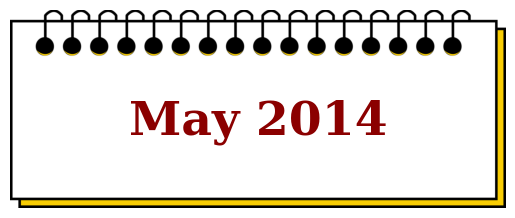

In [98]:
import time
import pygmt
import os

pygmt.config(FONT='15p,Helvetica-Bold')
# relief
grid = pygmt.datasets.load_earth_relief(resolution='03s', region=region)

for counter, t in enumerate(times):
    outfile = f'Manuela/gif/calendar{counter}.png'
    if os.path.isfile(outfile):
        continue
    ii = starttimes < t
    jj = endtimes > t
    i = ii & jj
    slat = lats[i]
    slon = lons[i]
    network = net[i]
    station = stat[i]
    for s, n in zip(station, network):
        style = []
        perm, comp3 = False, False
        

        # Here we check whether the stations are permanent
        # Change this if not needed!

        if s in statp and any(netp[statp==s] == n):
            # is a permanent station
            perm = True
        if s in stat3 and any(net3[stat3==s] == n):
            comp3 = True

        if perm and comp3:
            thiss = 's0.75c'
        elif perm:
            thiss = 'i0.75c'
        elif comp3:
            thiss = 's0.5c'
        else:
            thiss = 'i0.5c'

        style.append(thiss)
    

    fig = pygmt.Figure()
    
    fig.basemap(region=region, projection="M15c", frame=True)
    fig.grdimage(grid=grid, projection="M15c", cmap="geo")


    fig.plot(
        x=helen[1], y=helen[0], style="kvolcano/1c", color="red", pen="white",
        label='Volcanoes')

    if len(slon):
        fig.plot(
            x=slon, y=slat, style=style,
            color='cyan', pen="black")#, label=f'{stats.Network[0]}.{stats.Station[0]}')

    

    fig.colorbar(frame=["a500", "x+lElevation", "y+lm"])

    lonmid = (region[0] + region[1])/2
    latmid = (region[2] + region[3])/2 - 10
    with fig.inset(position="jBR+w6.5c/6.5c+o-2.9c/-.9c"):
        fig.coast(
            projection=f"G{lonmid}/{latmid}/60/6.5c", region="g", frame="g",
            land="tan", water='lightblue')
        fig.plot(
            x=helen[1], y=helen[0], style="kvolcano/0.45c", color="red",
            pen="black", projection=f"G{lonmid}/{latmid}/60/6.5c")

    fig.savefig(f'Manuela/gif/station_map_st_helens{counter}.png', dpi=100, transparent=True)
    # fig.show()


    # show image
    plt.imshow(im, extent=[-10,10,-4,4])
    plt.axis('off')
    font = {'family': 'serif',
            'color':  'darkred',
            'weight': 'bold',
            'size': 34,
            }
    plt.text(0, -.5, t.strftime('%b %Y'), fontdict=font,horizontalalignment='center',
        verticalalignment='center',)
    plt.savefig(f'Manuela/gif/calendar{counter}.png', dpi=100, transparent=True)
    
    plt.close()